# Iris Species Classificaiton

Dataset: https://www.kaggle.com/uciml/iris

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

Importing the data

In [3]:
data = pd.read_csv('iris.csv')

Viewing the Data

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


Viewing Species Count

<AxesSubplot:xlabel='Species', ylabel='count'>

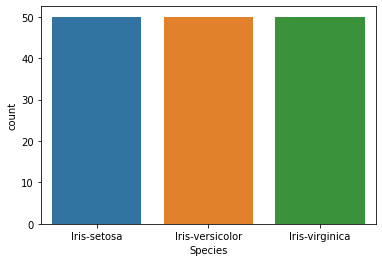

In [7]:
sns.countplot(x='Species',data=data)

Checking Missing Data

<AxesSubplot:>

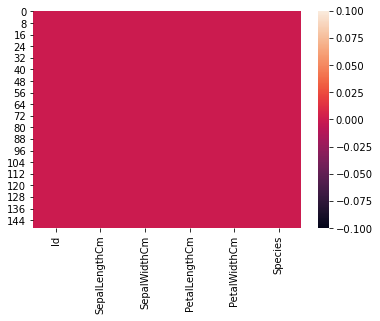

In [8]:
sns.heatmap(data.isnull())

Removing ID column

In [9]:
data = data.drop('Id',axis=1)

In [10]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Spliting into Target And Features

In [11]:
X = data.drop('Species',axis=1)
Y = data['Species']

Spliting Into Training and Testing Data

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=30)

Regression

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
model.coef_

array([[-0.39735611,  0.79685223, -2.32821726, -0.93763711],
       [ 0.55818345, -0.16252907, -0.09078763, -0.92022768],
       [-0.16082734, -0.63432316,  2.41900489,  1.85786479]])

In [14]:
p= model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(Y_test,p))
print("Accuracy:",round(accuracy_score(Y_test,p),2)*100,'%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 96.0 %


K-Nearest Neighbor(KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
Kp = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(Y_test,Kp))
print("Accuracy:",round(accuracy_score(Y_test,Kp),2)*100,'%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.91      0.77      0.83        13
 Iris-virginica       0.86      0.95      0.90        19

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45

Accuracy: 91.0 %


Navie Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

In [23]:
Np = mnb.predict(X_test)

In [25]:
print(classification_report(Y_test,Np))
print("Accuracy:",round(accuracy_score(Y_test,Np),2)*100,'%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.43      1.00      0.60        13
 Iris-virginica       1.00      0.11      0.19        19

       accuracy                           0.62        45
      macro avg       0.81      0.70      0.60        45
   weighted avg       0.84      0.62      0.54        45

Accuracy: 62.0 %


Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
Dp = dtc.predict(X_test)

In [30]:
print(classification_report(Y_test,Dp))
print("Accuracy:",round(accuracy_score(Y_test,Dp),2)*100,'%')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.77      0.80        13
 Iris-virginica       0.85      0.89      0.87        19

       accuracy                           0.89        45
      macro avg       0.89      0.89      0.89        45
   weighted avg       0.89      0.89      0.89        45

Accuracy: 89.0 %


Regression - 96.0 %

K-Nearest Neighbor(KNN)-  91.0 %

Navie Bayes- 62.0 %

Decision Tree -89.0 %